In [1]:
import numpy as np
import keras
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as mplt



In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Load images and labels

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(32, 32, 3, 73257)
(32, 32, 3, 26032)
(73257, 32, 32, 3)
(26032, 32, 32, 3)


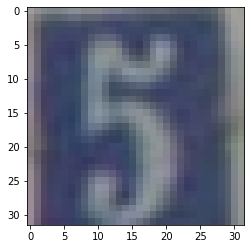

Label:  [5]
Min: 0.0, Max: 255.0


(14652, 10)

In [3]:
no_epoch=100
train_dataset = loadmat('/content/drive/My Drive/ALDA/train_32x32.mat')
test_dataset = loadmat('/content/drive/My Drive/ALDA/test_32x32.mat')

# Load images and labels

img_train = np.array(train_dataset['X'])
img_test = np.array(test_dataset['X'])

trainLbl = train_dataset['y']
testLbl = test_dataset['y']

# Check the shape of the data
print(img_train.shape)
print(img_test.shape)

# Fix the axes of the images

img_train = np.moveaxis(img_train, -1, 0)
img_test = np.moveaxis(img_test, -1, 0)

print(img_train.shape)
print(img_test.shape)

# Plot a random image and its label
mplt.imshow(img_train[13529])
mplt.show()

print('Label: ', trainLbl[13529])

# Convert train and test images into 'float64' type
img_train = img_train.astype('float64')
img_test = img_test.astype('float64')
# Convert train and test labels into 'int64' type

trainLbl = trainLbl.astype('int64')
testLbl = testLbl.astype('int64')
# Normalize the images data

print('Min: {}, Max: {}'.format(img_train.min(), img_train.max()))
#normalise the images
img_test /= 255.0
img_train /= 255.0

binaryform = LabelBinarizer()
trainLbl = binaryform.fit_transform(trainLbl)
testLbl = binaryform.fit_transform(testLbl)

# Split train data into train and validation
X_train_input, X_validation_input, Y_train_label, Y_validation_label = train_test_split(img_train, trainLbl,test_size=0.20, random_state=42)
Y_validation_label.shape



In [4]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
H=model.fit(X_train_input,Y_train_label,validation_data=(X_validation_input,Y_validation_label),epochs=no_epoch, batch_size=128)
model.summary()

Epoch 1/10
458/458 [==============================] - 6s 9ms/step - loss: 2.2439 - accuracy: 0.1914 - val_loss: 2.0820 - val_accuracy: 0.2544
Epoch 2/10
458/458 [==============================] - 3s 7ms/step - loss: 1.7612 - accuracy: 0.3924 - val_loss: 1.5835 - val_accuracy: 0.4638
Epoch 3/10
458/458 [==============================] - 3s 7ms/step - loss: 1.4421 - accuracy: 0.5244 - val_loss: 1.3928 - val_accuracy: 0.5442
Epoch 4/10
458/458 [==============================] - 3s 7ms/step - loss: 1.3190 - accuracy: 0.5734 - val_loss: 1.2779 - val_accuracy: 0.5888
Epoch 5/10
458/458 [==============================] - 2s 5ms/step - loss: 1.2179 - accuracy: 0.6160 - val_loss: 1.1968 - val_accuracy: 0.6239
Epoch 6/10
458/458 [==============================] - 2s 4ms/step - loss: 1.1459 - accuracy: 0.6414 - val_loss: 1.1222 - val_accuracy: 0.6493
Epoch 7/10
458/458 [==============================] - 2s 4ms/step - loss: 1.1043 - accuracy: 0.6550 - val_loss: 1.0806 - val_accuracy: 0.6604
Epoch 

0.6594710302385031
0.6821943520177459
0.67720475774127


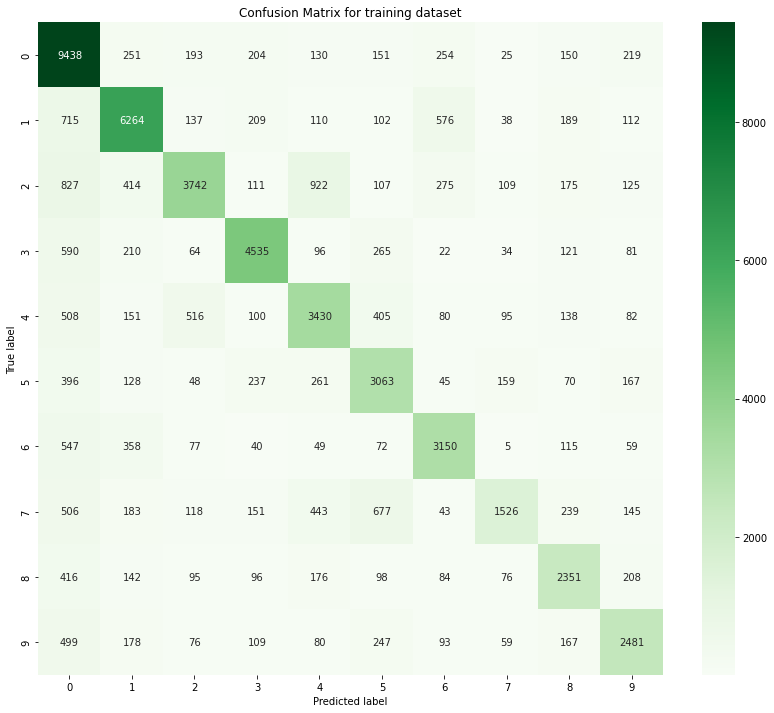

In [5]:
import seaborn as sns
import sklearn as sk
y_pred = model.predict(X_train_input)
y_predicted = binaryform.inverse_transform(y_pred, binaryform.classes_)
Y_train_label = binaryform.inverse_transform(Y_train_label, binaryform.classes_)
matrix = confusion_matrix(Y_train_label, y_predicted, labels=binaryform.classes_)
print(sk.metrics.f1_score(Y_train_label, y_predicted, average='macro'))
print(sk.metrics.f1_score(Y_train_label, y_predicted, average='micro'))
print(sk.metrics.f1_score(Y_train_label, y_predicted, average='weighted'))
fig, ax = mplt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
mplt.title('Confusion Matrix for training dataset')
mplt.xlabel('Predicted label')
mplt.ylabel('True label')
mplt.show()
# y_pred=np.argmax(y_pred, axis=1)
# y_train=np.argmax(Y_train_label, axis=1)
# cm = confusion_matrix(y_train, y_pred)
# print(cm)

0.6061319751333297
0.6421327596803934
0.6346812650457658


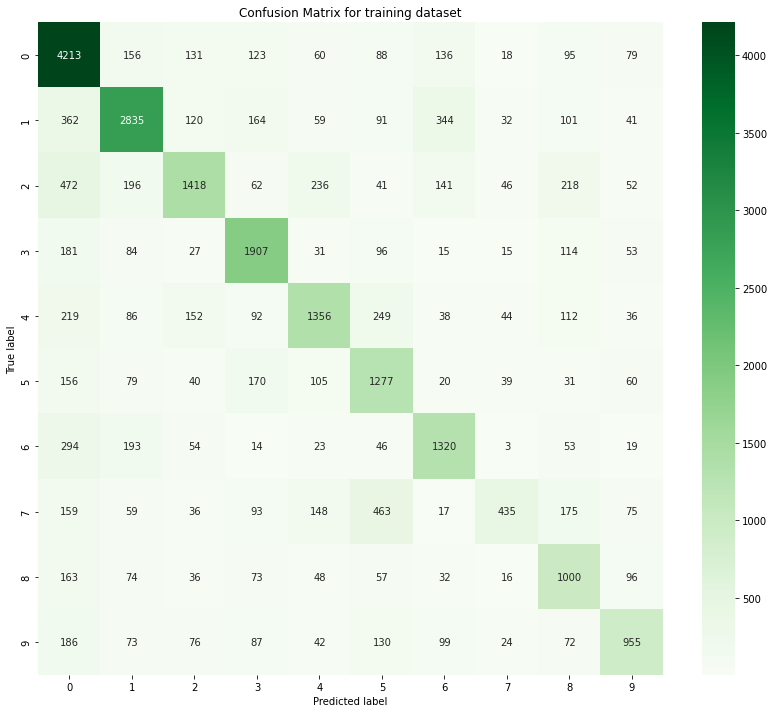

In [6]:
y_test_pred=model.predict(img_test)
y_predicted = binaryform.inverse_transform(y_test_pred, binaryform.classes_)
Y_test_label = binaryform.inverse_transform(testLbl, binaryform.classes_)
matrix = confusion_matrix(Y_test_label, y_predicted,labels=binaryform.classes_)
print(sk.metrics.f1_score(Y_test_label, y_predicted, average='macro'))
print(sk.metrics.f1_score(Y_test_label, y_predicted, average='micro'))
print(sk.metrics.f1_score(Y_test_label, y_predicted, average='weighted'))
fig, ax = mplt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
mplt.title('Confusion Matrix for training dataset')
mplt.xlabel('Predicted label')
mplt.ylabel('True label')
mplt.show()
